<h2>Stock Prediction<h2>

# Overview

Here, I'm  using Google share prices with open, high, low , close values for a particular day.
Using this data in our LSTM model we will predict the open prices for next 20 days.

Two files:
1. Training File
2. Test File



In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [3]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [4]:
#Importing the data
train= pd.read_csv('Price_train.csv')
test= pd.read_csv('Price_test.csv')

In [5]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
#taking open price from data in 2d array , if we will do train.loc[:, 'open'].values it gives one d array which wont
#be considered in scaling
train_open= train.iloc[:, 1:2].values


In [7]:
#Scaling the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [8]:
!pip install sklearn

In [9]:
#Scaling the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [10]:
train_open_scaled[60]

array([0.08627874])

Below we will be taking previous 60 days open datasteps to predict the next values so we are converting the data as per our input in LTSM layers.
i.e for taking 0 to 59 days open price to get 60th day price as output, 1 to 60 for 61, 2 to 61 for 62

In [11]:
# Feature selection
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [12]:
#Reshaping the train data to make it as input for LTSM layer input_shape(batchzise,timesteps,input_dim)
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [13]:
xtrain.shape

(1198, 60, 1)

### Building the LSTM Network

In [14]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [15]:
#initialisizng the model 
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

Epoch 1/100
40/40 [==============================] - 12s 88ms/step - loss: 0.0346
Epoch 2/100
40/40 [==============================] - 3s 86ms/step - loss: 0.0063
Epoch 3/100
40/40 [==============================] - 3s 85ms/step - loss: 0.0056
Epoch 4/100
40/40 [==============================] - 3s 85ms/step - loss: 0.0053
Epoch 5/100
40/40 [==============================] - 3s 84ms/step - loss: 0.0051
Epoch 6/100
40/40 [==============================] - 3s 85ms/step - loss: 0.0058
Epoch 7/100
40/40 [==============================] - 3s 85ms/step - loss: 0.0044
Epoch 8/100
40/40 [==============================] - 4s 93ms/step - loss: 0.0051
Epoch 9/100
40/40 [==============================] - 3s 87ms/step - loss: 0.0046
Epoch 10/100
40/40 [==============================] - 3s 86ms/step - loss: 0.0045
Epoch 11/100
40/40 [==============================] - 3s 84ms/step - loss: 0.0050
Epoch 12/100
40/40 [==============================] - 3s 84ms/step - loss: 0.0041
Epoch 13/100
40/40 [====

40/40 [==============================] - 4s 91ms/step - loss: 0.0013


### Predicting for test data

As we have 60 input in our layer, we will concatenate our train and test and will take last 60 values of our training set with test set

In [16]:

test_open= test.iloc[:, 1:2].values #taking  open price
total= pd.concat([train['Open'],test['Open']],axis=0) # Concating train and test and then will take last 60 train point
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) # reshaping it to get it transformed
test_input= ss.transform(test_input)

In [17]:
xtest= []
for i in range(60,80):
    xtest.append(test_input[i-60:i,0]) #creating input for lstm prediction

In [18]:
xtest= np.array(xtest)

In [19]:
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= regression.predict(xtest)

1/1 [==============================] - 2s 2s/step


In [20]:
predicted_value= ss.inverse_transform(predicted_value)

### Plotting the data

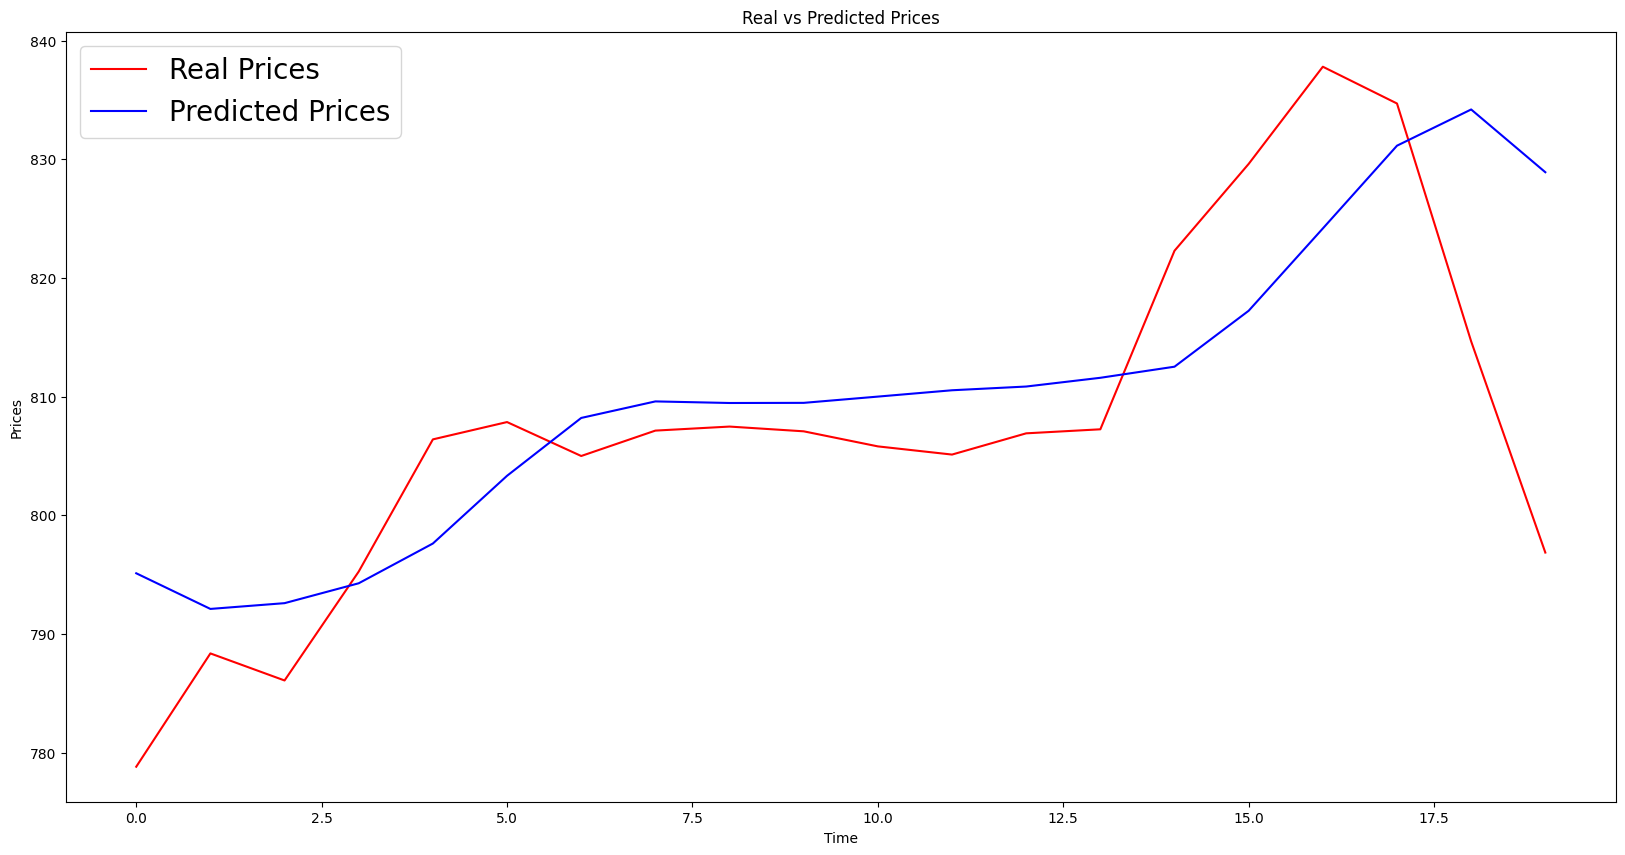

In [21]:
plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)


In [22]:
from keras.wrappers.scikit_learn import KerasRegressor

In [23]:
def reg(optimizer):
    #initialisizng the model 
    regression= Sequential()

    #First Input layer and LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
    regression.add(Dropout(0.2))

    # Second LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer= 'glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Third LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
    regression.add(Dropout(0.2))
    #Output layer , we wont pass any activation as its continous value model
    regression.add(Dense(units=1))

    #Compiling the network
    regression.compile(optimizer=optimizer,loss='mean_squared_error')
    
    return regression

model= KerasRegressor(build_fn=reg)

C:\Users\syedf\AppData\Local\Temp\ipykernel_12456\2440103601.py:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model= KerasRegressor(build_fn=reg)


In [24]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'batch_size': [50, 32],
              'epochs': [50, 25],
              'optimizer': ['adam', 'rmsprop','sgd','adadelta']}
grid_search = RandomizedSearchCV(estimator = model,param_distributions=parameters,n_iter=5)
# fitting the model and Calculating the best parameters.
grid_search = grid_search.fit(xtrain, ytrain)
best_parameters = grid_search.best_params_

Epoch 1/25
30/30 [==============================] - 11s 86ms/step - loss: 0.1198
Epoch 2/25
30/30 [==============================] - 3s 87ms/step - loss: 0.0438
Epoch 3/25
30/30 [==============================] - 3s 85ms/step - loss: 0.0425
Epoch 4/25
30/30 [==============================] - 3s 87ms/step - loss: 0.0410
Epoch 5/25
30/30 [==============================] - 3s 85ms/step - loss: 0.0385
Epoch 6/25
30/30 [==============================] - 3s 86ms/step - loss: 0.0366
Epoch 7/25
30/30 [==============================] - 3s 86ms/step - loss: 0.0359
Epoch 8/25
30/30 [==============================] - 3s 85ms/step - loss: 0.0330
Epoch 9/25
30/30 [==============================] - 3s 85ms/step - loss: 0.0303
Epoch 10/25
30/30 [==============================] - 3s 87ms/step - loss: 0.0286
Epoch 11/25
30/30 [==============================] - 3s 85ms/step - loss: 0.0254
Epoch 12/25
30/30 [==============================] - 3s 84ms/step - loss: 0.0221
Epoch 13/25
30/30 [=================

8/8 [==============================] - 2s 27ms/step - loss: 0.0043
Epoch 1/25
30/30 [==============================] - 9s 85ms/step - loss: 0.0777
Epoch 2/25
30/30 [==============================] - 3s 87ms/step - loss: 0.0473
Epoch 3/25
30/30 [==============================] - 3s 89ms/step - loss: 0.0461
Epoch 4/25
30/30 [==============================] - 3s 89ms/step - loss: 0.0441
Epoch 5/25
30/30 [==============================] - 3s 86ms/step - loss: 0.0415
Epoch 6/25
30/30 [==============================] - 3s 87ms/step - loss: 0.0390
Epoch 7/25
30/30 [==============================] - 3s 86ms/step - loss: 0.0353
Epoch 8/25
30/30 [==============================] - 3s 86ms/step - loss: 0.0323
Epoch 9/25
30/30 [==============================] - 3s 87ms/step - loss: 0.0295
Epoch 10/25
30/30 [==============================] - 3s 88ms/step - loss: 0.0248
Epoch 11/25
30/30 [==============================] - 3s 86ms/step - loss: 0.0201
Epoch 12/25
30/30 [==============================] 

20/20 [==============================] - 2s 97ms/step - loss: 0.0057
Epoch 24/25
20/20 [==============================] - 2s 97ms/step - loss: 0.0053
Epoch 25/25
5/5 [==============================] - 2s 38ms/step - loss: 0.0051
Epoch 1/25
20/20 [==============================] - 11s 126ms/step - loss: 0.0500
Epoch 2/25
20/20 [==============================] - 3s 139ms/step - loss: 0.0169
Epoch 3/25
20/20 [==============================] - 2s 116ms/step - loss: 0.0116
Epoch 4/25
20/20 [==============================] - 2s 117ms/step - loss: 0.0125
Epoch 5/25
20/20 [==============================] - 3s 131ms/step - loss: 0.0118
Epoch 6/25
20/20 [==============================] - 2s 107ms/step - loss: 0.0098
Epoch 7/25
20/20 [==============================] - 2s 112ms/step - loss: 0.0089
Epoch 8/25
20/20 [==============================] - 3s 137ms/step - loss: 0.0090
Epoch 9/25
20/20 [==============================] - 2s 111ms/step - loss: 0.0071
Epoch 10/25
20/20 [======================

20/20 [==============================] - 2s 100ms/step - loss: 0.0039
Epoch 47/50
20/20 [==============================] - 2s 101ms/step - loss: 0.0040
Epoch 48/50
20/20 [==============================] - 2s 101ms/step - loss: 0.0038
Epoch 49/50
20/20 [==============================] - 2s 101ms/step - loss: 0.0040
Epoch 50/50
5/5 [==============================] - 2s 31ms/step - loss: 7.3117e-04
Epoch 1/50
20/20 [==============================] - 9s 97ms/step - loss: 0.0808
Epoch 2/50
20/20 [==============================] - 2s 99ms/step - loss: 0.0127
Epoch 3/50
20/20 [==============================] - 2s 98ms/step - loss: 0.0068
Epoch 4/50
20/20 [==============================] - 2s 98ms/step - loss: 0.0061
Epoch 5/50
20/20 [==============================] - 2s 98ms/step - loss: 0.0063
Epoch 6/50
20/20 [==============================] - 2s 102ms/step - loss: 0.0063
Epoch 7/50
20/20 [==============================] - 2s 101ms/step - loss: 0.0070
Epoch 8/50
20/20 [=====================

20/20 [==============================] - 2s 113ms/step - loss: 0.0036
Epoch 45/50
20/20 [==============================] - 2s 116ms/step - loss: 0.0041
Epoch 46/50
20/20 [==============================] - 2s 115ms/step - loss: 0.0035
Epoch 47/50
20/20 [==============================] - 2s 118ms/step - loss: 0.0036
Epoch 48/50
20/20 [==============================] - 2s 110ms/step - loss: 0.0029
Epoch 49/50
20/20 [==============================] - 2s 110ms/step - loss: 0.0031
Epoch 50/50
5/5 [==============================] - 2s 41ms/step - loss: 0.0012
Epoch 1/50
20/20 [==============================] - 11s 120ms/step - loss: 0.0750
Epoch 2/50
20/20 [==============================] - 2s 117ms/step - loss: 0.0091
Epoch 3/50
20/20 [==============================] - 2s 117ms/step - loss: 0.0055
Epoch 4/50
20/20 [==============================] - 2s 120ms/step - loss: 0.0050
Epoch 5/50
20/20 [==============================] - 2s 116ms/step - loss: 0.0045
Epoch 6/50
20/20 [=================

20/20 [==============================] - 2s 110ms/step - loss: 0.0024
Epoch 43/50
20/20 [==============================] - 2s 105ms/step - loss: 0.0022
Epoch 44/50
20/20 [==============================] - 2s 106ms/step - loss: 0.0024
Epoch 45/50
20/20 [==============================] - 2s 105ms/step - loss: 0.0027
Epoch 46/50
20/20 [==============================] - 2s 107ms/step - loss: 0.0021
Epoch 47/50
20/20 [==============================] - 2s 108ms/step - loss: 0.0023
Epoch 48/50
20/20 [==============================] - 2s 105ms/step - loss: 0.0024
Epoch 49/50
20/20 [==============================] - 2s 106ms/step - loss: 0.0022
Epoch 50/50
5/5 [==============================] - 2s 38ms/step - loss: 0.0016
Epoch 1/50
30/30 [==============================] - 12s 112ms/step - loss: 0.0421
Epoch 2/50
30/30 [==============================] - 3s 109ms/step - loss: 0.0187
Epoch 3/50
30/30 [==============================] - 3s 110ms/step - loss: 0.0169
Epoch 4/50
30/30 [===============

30/30 [==============================] - 3s 100ms/step - loss: 0.0039
Epoch 41/50
30/30 [==============================] - 3s 101ms/step - loss: 0.0037
Epoch 42/50
30/30 [==============================] - 3s 100ms/step - loss: 0.0038
Epoch 43/50
30/30 [==============================] - 3s 100ms/step - loss: 0.0032
Epoch 44/50
30/30 [==============================] - 3s 98ms/step - loss: 0.0036
Epoch 45/50
30/30 [==============================] - 3s 99ms/step - loss: 0.0035
Epoch 46/50
30/30 [==============================] - 3s 99ms/step - loss: 0.0033
Epoch 47/50
30/30 [==============================] - 3s 99ms/step - loss: 0.0033
Epoch 48/50
30/30 [==============================] - 3s 99ms/step - loss: 0.0031
Epoch 49/50
30/30 [==============================] - 3s 100ms/step - loss: 0.0032
Epoch 50/50
8/8 [==============================] - 2s 32ms/step - loss: 5.6374e-04
Epoch 1/50
30/30 [==============================] - 11s 101ms/step - loss: 0.0462
Epoch 2/50
30/30 [==============

30/30 [==============================] - 3s 94ms/step - loss: 0.0031
Epoch 40/50
30/30 [==============================] - 3s 94ms/step - loss: 0.0029
Epoch 41/50
30/30 [==============================] - 3s 93ms/step - loss: 0.0032
Epoch 42/50
30/30 [==============================] - 3s 94ms/step - loss: 0.0027
Epoch 43/50
30/30 [==============================] - 3s 93ms/step - loss: 0.0029
Epoch 44/50
30/30 [==============================] - 3s 92ms/step - loss: 0.0027
Epoch 45/50
30/30 [==============================] - 3s 95ms/step - loss: 0.0027
Epoch 46/50
30/30 [==============================] - 3s 93ms/step - loss: 0.0028
Epoch 47/50
30/30 [==============================] - 3s 92ms/step - loss: 0.0026
Epoch 48/50
30/30 [==============================] - 3s 92ms/step - loss: 0.0026
Epoch 49/50
30/30 [==============================] - 3s 92ms/step - loss: 0.0025
Epoch 50/50
8/8 [==============================] - 2s 28ms/step - loss: 0.0078
Epoch 1/50
30/30 [========================

30/30 [==============================] - 3s 94ms/step - loss: 0.0515
Epoch 39/50
30/30 [==============================] - 3s 93ms/step - loss: 0.0465
Epoch 40/50
30/30 [==============================] - 3s 95ms/step - loss: 0.0430
Epoch 41/50
30/30 [==============================] - 3s 92ms/step - loss: 0.0360
Epoch 42/50
30/30 [==============================] - 3s 92ms/step - loss: 0.0315
Epoch 43/50
30/30 [==============================] - 3s 93ms/step - loss: 0.0305
Epoch 44/50
30/30 [==============================] - 3s 93ms/step - loss: 0.0264
Epoch 45/50
30/30 [==============================] - 3s 93ms/step - loss: 0.0237
Epoch 46/50
30/30 [==============================] - 3s 96ms/step - loss: 0.0217
Epoch 47/50
30/30 [==============================] - 3s 93ms/step - loss: 0.0208
Epoch 48/50
30/30 [==============================] - 3s 94ms/step - loss: 0.0195
Epoch 49/50
30/30 [==============================] - 3s 95ms/step - loss: 0.0190
Epoch 50/50
8/8 [=======================

30/30 [==============================] - 3s 93ms/step - loss: 0.2389
Epoch 38/50
30/30 [==============================] - 3s 93ms/step - loss: 0.2338
Epoch 39/50
30/30 [==============================] - 3s 92ms/step - loss: 0.2254
Epoch 40/50
30/30 [==============================] - 3s 92ms/step - loss: 0.2209
Epoch 41/50
30/30 [==============================] - 3s 95ms/step - loss: 0.2147
Epoch 42/50
30/30 [==============================] - 3s 91ms/step - loss: 0.2074
Epoch 43/50
30/30 [==============================] - 3s 91ms/step - loss: 0.1988
Epoch 44/50
30/30 [==============================] - 3s 91ms/step - loss: 0.1934
Epoch 45/50
30/30 [==============================] - 3s 91ms/step - loss: 0.1838
Epoch 46/50
30/30 [==============================] - 3s 91ms/step - loss: 0.1771
Epoch 47/50
30/30 [==============================] - 3s 94ms/step - loss: 0.1690
Epoch 48/50
30/30 [==============================] - 3s 92ms/step - loss: 0.1617
Epoch 49/50
30/30 [=====================

30/30 [==============================] - 3s 93ms/step - loss: 0.1011
Epoch 37/50
30/30 [==============================] - 3s 93ms/step - loss: 0.0966
Epoch 38/50
30/30 [==============================] - 3s 94ms/step - loss: 0.0940
Epoch 39/50
30/30 [==============================] - 3s 92ms/step - loss: 0.0883
Epoch 40/50
30/30 [==============================] - 3s 92ms/step - loss: 0.0843
Epoch 41/50
30/30 [==============================] - 3s 92ms/step - loss: 0.0803
Epoch 42/50
30/30 [==============================] - 3s 91ms/step - loss: 0.0763
Epoch 43/50
30/30 [==============================] - 3s 93ms/step - loss: 0.0720
Epoch 44/50
30/30 [==============================] - 3s 93ms/step - loss: 0.0667
Epoch 45/50
30/30 [==============================] - 3s 92ms/step - loss: 0.0632
Epoch 46/50
30/30 [==============================] - 3s 93ms/step - loss: 0.0590
Epoch 47/50
30/30 [==============================] - 3s 91ms/step - loss: 0.0556
Epoch 48/50
30/30 [=====================

In [25]:
model=grid_search.best_estimator_.fit(xtrain,ytrain)

Epoch 1/50
24/24 [==============================] - 10s 103ms/step - loss: 0.0624
Epoch 2/50
24/24 [==============================] - 2s 103ms/step - loss: 0.0085
Epoch 3/50
24/24 [==============================] - 2s 101ms/step - loss: 0.0064
Epoch 4/50
24/24 [==============================] - 2s 101ms/step - loss: 0.0055
Epoch 5/50
24/24 [==============================] - 2s 101ms/step - loss: 0.0051
Epoch 6/50
24/24 [==============================] - 2s 101ms/step - loss: 0.0052
Epoch 7/50
24/24 [==============================] - 3s 104ms/step - loss: 0.0049
Epoch 8/50
24/24 [==============================] - 2s 101ms/step - loss: 0.0049
Epoch 9/50
24/24 [==============================] - 2s 102ms/step - loss: 0.0048
Epoch 10/50
24/24 [==============================] - 2s 102ms/step - loss: 0.0046
Epoch 11/50
24/24 [==============================] - 2s 103ms/step - loss: 0.0047
Epoch 12/50
24/24 [==============================] - 2s 103ms/step - loss: 0.0052
Epoch 13/50
24/24 [=====

In [26]:
model

1/1 [==============================] - 1s 1s/step


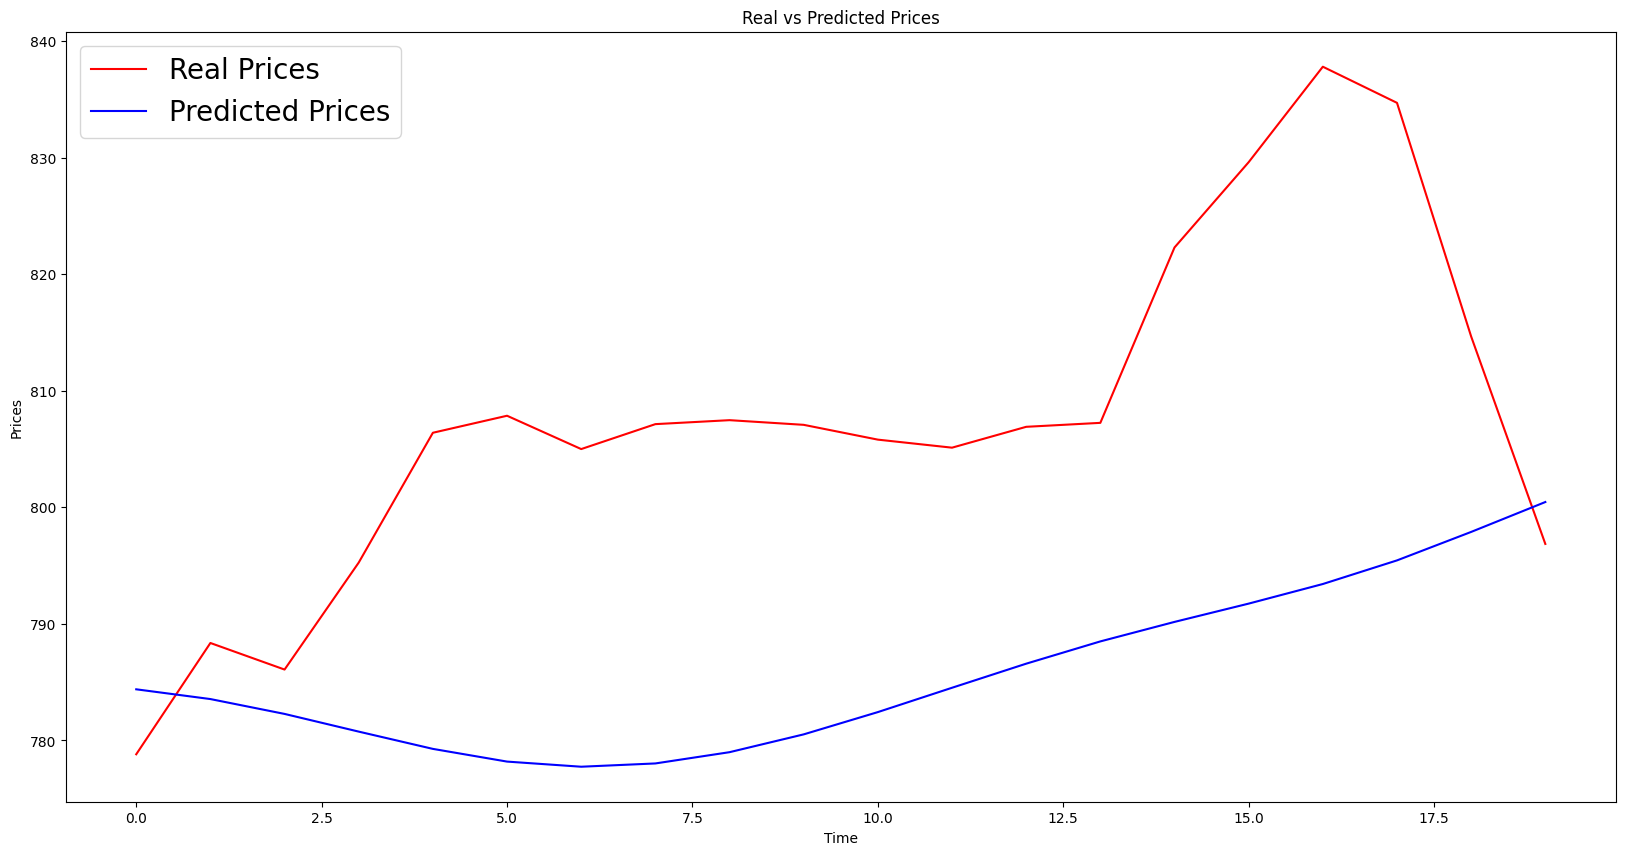

In [27]:
predicted_value= grid_search.predict(xtest)
predicted_value= ss.inverse_transform(predicted_value.reshape(-1,1))


plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)
